In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
import os as os
from itertools import product
import numpy as np
import scipy.stats as ss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
timss_data = pd.read_excel('TIMSS2019.xlsx')

In [3]:
timss_data

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,finalscore,totalscore,finalscorealgebra,finalscoredat,finalscoregeo,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
0,364,1,5001,500104,50010404,D,14.0,A,D,E,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
1,364,1,5001,500104,50010418,D,11.0,D,D,E,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
2,364,1,5001,500104,50010432,B,31.0,B,D,C,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
3,364,1,5002,500201,50020114,E,6.0,D,E,E,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667
4,364,1,5002,500201,50020128,D,15.0,D,C,E,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,364,14,5218,521801,52180101,D,16.0,D,D,D,...,2,3,3,1,1,2,100.0,28.57143,100.00000,83.33333
5976,364,14,5219,521901,52190109,D,9.0,E,E,C,...,5,3,2,2,1,2,100.0,71.42857,100.00000,83.33333
5977,364,14,5219,521901,52190123,E,7.0,E,E,D,...,5,3,2,2,1,2,100.0,71.42857,100.00000,83.33333
5978,364,14,5220,522001,52200113,D,9.0,E,E,C,...,4,3,3,2,3,2,100.0,14.28571,83.33333,66.66667


In [4]:
timss_data = timss_data.query('IDCNTRY==364')
timss_data = timss_data.drop_duplicates(subset=['IDSTUD'], keep='last')

In [5]:
timss_data.info(verbose=True , null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5980 entries, 0 to 5979
Data columns (total 338 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    IDCNTRY            5980 non-null   int64  
 1    IDBOOK             5980 non-null   int64  
 2    IDSCHOOL           5980 non-null   int64  
 3    IDCLASS            5980 non-null   int64  
 4    IDSTUD             5980 non-null   int64  
 5    finalscore         5975 non-null   object 
 6    totalscore         5980 non-null   float64
 7    finalscorealgebra  5962 non-null   object 
 8    finalscoredat      5950 non-null   object 
 9    finalscoregeo      5955 non-null   object 
 10   finalscorenum      5973 non-null   object 
 11   BSBG01             5979 non-null   float64
 12   BSBG03             5979 non-null   float64
 13   BSBG04             5979 non-null   float64
 14   BSBG05A            5979 non-null   float64
 15   BSBG05B            5979 non-null   float64
 16   BSBG

<ipython-input-5-69deafc53138>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  timss_data.info(verbose=True , null_counts = True)


In [6]:
timss_data = timss_data.drop(columns=['BSBGSEC', 'BSDGSEC'])
timss_data = timss_data.dropna()

In [7]:
data_BCGM7 = pd.read_excel(r'T2019-G8-Codebook.xlsx', sheet_name='BCGM7')
data_BSGM7 = pd.read_excel(r'T2019-G8-Codebook.xlsx', sheet_name='BSGM7')
data_BTMM7 = pd.read_excel(r'T2019-G8-Codebook.xlsx', sheet_name='BTMM7')

In [8]:
df_BCGM7 = pd.DataFrame(data_BCGM7 , columns=['Variable' , 'Label'])
df_BCGM7['kind'] = '1'
df_BSGM7 = pd.DataFrame(data_BSGM7 , columns=['Variable' , 'Label'])
df_BSGM7['kind'] = '2'
df_BTMM7 = pd.DataFrame(data_BTMM7 , columns=['Variable' , 'Label'])
df_BTMM7['kind'] = '3'

In [9]:
timss_data = timss_data.replace(['A', 'B', 'C', 'D', 'E'], [5, 4, 3, 2, 1])

In [10]:
type(timss_data['finalscore'][0])

numpy.int64

In [11]:
timss_data = timss_data.drop(columns=['IDSTUD', 'IDCNTRY', 'IDSCHOOL', 'IDCLASS', 'IDBOOK', 'totalscore'])

In [12]:
timss_data = timss_data.dropna(subset=['finalscore', 'finalscorealgebra', 'finalscoredat',	'finalscoregeo', 'finalscorenum'])

In [13]:
timss_data = timss_data.dropna()

In [14]:
def z_score(df):
    normalized_timss_data = timss_data.copy()
    for column in normalized_timss_data.columns:
      normalized_timss_data[column]=(normalized_timss_data[column] - normalized_timss_data[column].mean())/normalized_timss_data[column].std()
    return normalized_timss_data

In [15]:
timss_data

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
0,2,5,2,1,1,1.0,2.0,3.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
1,2,2,2,1,2,1.0,1.0,3.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
2,4,4,2,3,4,1.0,1.0,4.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
3,1,2,1,1,1,1.0,1.0,2.0,2.0,2.0,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667
4,2,2,3,1,2,1.0,1.0,2.0,1.0,1.0,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,...,2,3,3,1,1,2,100.0,28.57143,100.00000,83.33333
5976,2,1,1,3,1,1.0,4.0,1.0,2.0,1.0,...,5,3,2,2,1,2,100.0,71.42857,100.00000,83.33333
5977,1,1,1,2,1,1.0,3.0,2.0,1.0,2.0,...,5,3,2,2,1,2,100.0,71.42857,100.00000,83.33333
5978,2,1,1,3,1,2.0,1.0,5.0,1.0,1.0,...,4,3,3,2,3,2,100.0,14.28571,83.33333,66.66667


In [16]:
correlation = timss_data.corr(method="spearman" )
corrlist = []

#all the columns except finalscores columns that have coefficient upto 0.5
for i in correlation.columns:
  if i not in (['finalscore', 'finalscorealgebra', 'finalscoredat',	'finalscoregeo', 'finalscorenum'] + corrlist):
    temp = correlation[i]
    temp = temp[abs(temp) >= 0.5]
    temp = temp[temp.index != i]

    for column in list(temp.index):
      if column not in corrlist:
        corrlist.append(column)
df2 = timss_data.copy()
#remove all the correlated columns and just keeps on of them
timss_data = timss_data.drop(columns = corrlist)

In [17]:
timss_data

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM22BA,BTBM22AC,BTBM22AD,BTBM22BD,BTBM22AE,BTBM22AF,BTBM22AG,BTBM22BG,BTBM23,BTDMNUM
0,2,5,2,1,1,1.0,2.0,3.0,1.0,1.0,...,1,2,2,1,1,1,2,9,5,100.0
1,2,2,2,1,2,1.0,1.0,3.0,1.0,1.0,...,1,2,2,1,1,1,2,9,5,100.0
2,4,4,2,3,4,1.0,1.0,4.0,1.0,1.0,...,1,2,2,1,1,1,2,9,5,100.0
3,1,2,1,1,1,1.0,1.0,2.0,2.0,2.0,...,2,2,2,1,2,2,2,2,4,100.0
4,2,2,3,1,2,1.0,1.0,2.0,1.0,1.0,...,2,2,2,1,2,2,2,2,4,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,...,1,2,1,1,2,2,2,1,2,100.0
5976,2,1,1,3,1,1.0,4.0,1.0,2.0,1.0,...,2,1,1,1,1,1,1,1,5,100.0
5977,1,1,1,2,1,1.0,3.0,2.0,1.0,2.0,...,2,1,1,1,1,1,1,1,5,100.0
5978,2,1,1,3,1,2.0,1.0,5.0,1.0,1.0,...,2,2,2,1,1,1,1,2,4,100.0


In [18]:
invalidlist = []

for i in timss_data.columns:
   invalidlist.append((i, len(timss_data[timss_data[i]==9])))

invalidlist.sort(key = lambda x: x[1])
invalidlist

[('finalscore', 0),
 ('finalscorealgebra', 0),
 ('finalscoredat', 0),
 ('finalscoregeo', 0),
 ('finalscorenum', 0),
 ('BSBG01', 0),
 ('BSDAGE', 0),
 ('BCBG04', 0),
 ('BCBG05A', 0),
 ('BCBG06A', 0),
 ('BCBG06B', 0),
 ('BCBG06C', 0),
 ('BCBG09', 0),
 ('BCBG10A', 0),
 ('BCBG12', 0),
 ('BCBG13AA', 0),
 ('BCBG13AG', 0),
 ('BCBG13BC', 0),
 ('BCBG14A', 0),
 ('BCBG14C', 0),
 ('BCBG14G', 0),
 ('BCBG14I', 0),
 ('BCBG14K', 0),
 ('BCBG15A', 0),
 ('BCBG15C', 0),
 ('BCBG15D', 0),
 ('BCBG15G', 0),
 ('BCBG15H', 0),
 ('BCBG16C', 0),
 ('BCBG17A', 0),
 ('BCBG20', 0),
 ('BCDGMRS', 0),
 ('BTBG04', 0),
 ('BTBG05F', 0),
 ('BTBG05G', 0),
 ('BTBG05H', 0),
 ('BTBG07A', 0),
 ('BTBG07D', 0),
 ('BTBG07H', 0),
 ('BTBG08A', 0),
 ('BTBG09F', 0),
 ('BTBG09G', 0),
 ('BTBG09H', 0),
 ('BTBG11', 0),
 ('BTBG13A', 0),
 ('BTBG13B', 0),
 ('BTBG13C', 0),
 ('BTBG13D', 0),
 ('BTBG13H', 0),
 ('BTBM14', 0),
 ('BTBM15A', 0),
 ('BTBM15C', 0),
 ('BTBM15D', 0),
 ('BTBM15F', 0),
 ('BTBM16', 0),
 ('BTBM17A', 0),
 ('BTBM19CA', 0),
 ('BTB

In [19]:
timss_data = timss_data.drop(columns=['BSBM27AA', 'BSBM27BA', 'BCBG21C' ,'BCBG03B' , 'BSBM26BA', 'BTBM22BG', 'BSBM26AA', 'BTBM22BD', 'BCBG18','BTBM22BA'])

In [20]:
timss_data

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM20E,BTBM21,BTBM22AA,BTBM22AC,BTBM22AD,BTBM22AE,BTBM22AF,BTBM22AG,BTBM23,BTDMNUM
0,2,5,2,1,1,1.0,2.0,3.0,1.0,1.0,...,3,5,1,2,2,1,1,2,5,100.0
1,2,2,2,1,2,1.0,1.0,3.0,1.0,1.0,...,3,5,1,2,2,1,1,2,5,100.0
2,4,4,2,3,4,1.0,1.0,4.0,1.0,1.0,...,3,5,1,2,2,1,1,2,5,100.0
3,1,2,1,1,1,1.0,1.0,2.0,2.0,2.0,...,3,3,2,2,2,2,2,2,4,100.0
4,2,2,3,1,2,1.0,1.0,2.0,1.0,1.0,...,3,3,2,2,2,2,2,2,4,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,...,3,5,2,2,1,2,2,2,2,100.0
5976,2,1,1,3,1,1.0,4.0,1.0,2.0,1.0,...,3,5,1,1,1,1,1,1,5,100.0
5977,1,1,1,2,1,1.0,3.0,2.0,1.0,2.0,...,3,5,1,1,1,1,1,1,5,100.0
5978,2,1,1,3,1,2.0,1.0,5.0,1.0,1.0,...,2,5,1,2,2,1,1,1,4,100.0


In [21]:
def show_corr(df, x, y):
  df = df[[x, y]]
  feature_max = max(df[x])
  if feature_max in [9, 99, 999, 9999, 99999, 999999]:
    df = df[df[x]<feature_max]
  df = df.groupby(x).mean()
  print("\n correlation of", y, "and", x,': ')
  df.plot(y = y, kind='line', alpha = 0.3,figsize=(10, 6))
  plt.show()

#Questions

In [22]:
normal_timss_data = z_score(timss_data)

In [23]:
df_detail = pd.concat([df_BCGM7 , df_BSGM7 , df_BTMM7 ])

In [24]:
def select_feature_with_correlation(df , y , limit):
    corr = df.corr()[y]
    df_corr = pd.DataFrame(corr)
    df_corr = df_corr.rename(columns={"finalscore": "correlation"})
    df_corr['Variable'] = corr.index
    df_corr = pd.merge(df_corr, df_detail, how='inner', on = 'Variable')
    opp_or = (df_corr['correlation']>= limit).apply(int) + (df_corr['correlation']<= -limit).apply(int) > 0
    important_features = df_corr[opp_or].sort_values(by='correlation', ascending=False)
    return important_features

<Axes: xlabel='Label'>

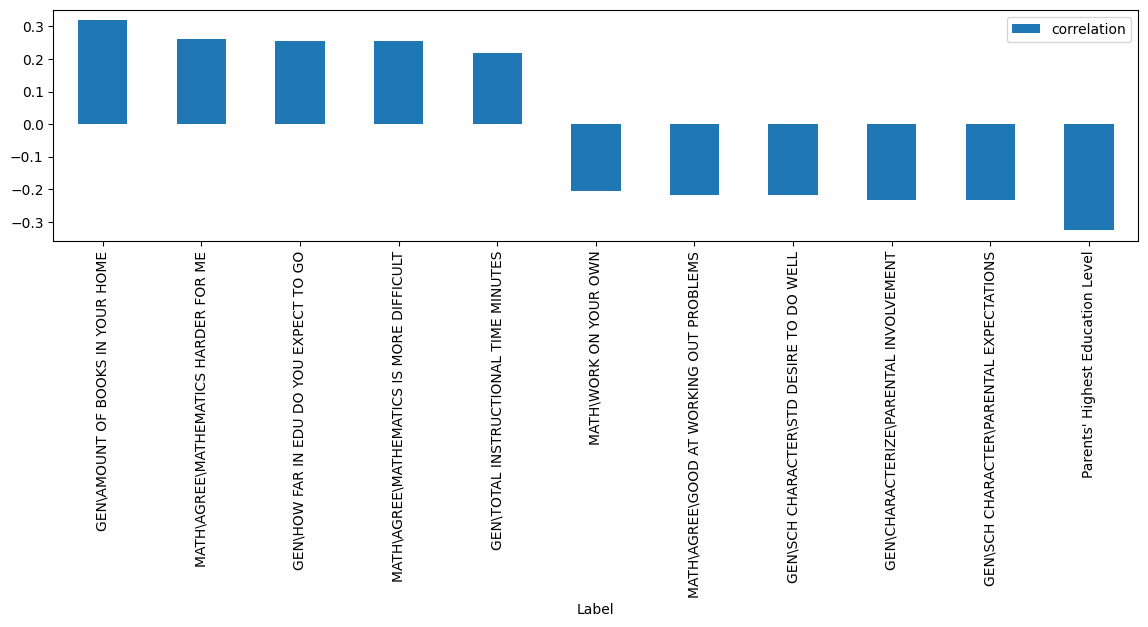

In [25]:
important_features = select_feature_with_correlation(timss_data , 'finalscore' , 0.2)
important_features.plot.bar(x = 'Label', y = 'correlation',figsize=(14,3))

In [26]:
def select_feature_with_chi2(df , y):
    X = df.iloc[: , 11:]  #independent columns
    y = df[y]    #target column
    #apply SelectKBest class to extract best features
    bestfeatures = SelectKBest(score_func=chi2)
    fit = bestfeatures.fit(X,y)
    dfpvalue = pd.DataFrame(fit.pvalues_)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat three dataframes for better visualization
    featureScores = pd.concat([dfcolumns,dfscores , dfpvalue],axis=1)
    featureScores.columns = ['Variable','Score','pvalue']  #naming the dataframe columns
    featureScores = pd.merge(featureScores, df_detail, how='inner', on = 'Variable')
    important_feature_with_chi2 = featureScores.sort_values(by='Score', ascending=False)
    return important_feature_with_chi2

In [27]:
important_features_chi2 = select_feature_with_chi2(timss_data , 'finalscore')
important_features_chi2
# not_uniques, best_attributes = xgbClassifier(clean_normal_timss_data,'finalscore', ['finalscorealgebra', 'finalscoredat',	'finalscoregeo', 'finalscorenum'] )


,Variable,Score,pvalue,Label,kind
134,BTBM14,2529.579619,0.000000e+00,MATH\TIME SPENT MATH INSTR MINUTES,3
62,BCBG07,1539.781230,0.000000e+00,GEN\TOTAL NUMBER COMPUTERS,1
60,BCBG06B,1484.586943,0.000000e+00,GEN\TOTAL INSTRUCTIONAL TIME MINUTES,1
58,BCBG05A,1344.562391,7.247414e-290,GEN\HOW MANY PEOPLE LIVE IN AREA,1
119,BTBG11,571.695933,2.067556e-122,GEN\NUMBER STD LANGUAGE DIFFICULTIES,3
...,...,...,...,...,...
99,BTBG05F,0.335854,9.873837e-01,GEN\MAJOR AREA OF STUDY\EDU MATHEMATICS,3
150,BTBM18BE,0.234200,9.936562e-01,MATH\TOPIC\ALGEBRA\FUNCTIONS,3
10,BSBG09B,0.176368,9.963330e-01,GEN\BORN IN <COUNTRY>\AGE CAME TO COUNTRY,2
21,BSBG13B,0.135004,9.978217e-01,GEN\AGREE\SAFE AT SCHOOL,2


In [28]:
# using DesicionTree in scikit_learn.tree library
def desicion_tree(dataframe, target_column, unnecessary_columns):
  temp = dataframe.nunique().sort_values(ascending=False)

  # remove features with distinct value more than 8
  temp = temp[temp>8]
  not_unique_attributes = list(temp.keys())
  print("\nfeatures with more than 8 unique values:", not_unique_attributes)

  # "y" is the feature that we want to analys
  y = dataframe[target_column]
  X = dataframe.drop(columns = not_unique_attributes + [target_column]+ unnecessary_columns)
  print("\nafter remove extra features: \n", X.nunique().sort_values(ascending=False))

  dt = DecisionTreeClassifier()
  dt.fit(X, y)

  print("\nthe most important features (features on top of the tree): ")

  # inorder to dimension reduction, we use features betwean depths 0 to 20
  # but thay are useful in correlation analysis so we retrieve them back
  best_attributes = pd.DataFrame(dt.feature_importances_,
                                 index = X.columns,
                                 columns=['importance']).sort_values('importance',
                                                                     ascending=False).head(20)
  print(best_attributes)
  return not_unique_attributes, list(best_attributes.index)

In [29]:
not_unique_attributes, best_attributes = desicion_tree(timss_data,
                                                       'finalscore',
                                                       ['finalscorealgebra', 'finalscoredat',	'finalscoregeo', 'finalscorenum']
                                                       )


features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BCBG06B', 'BTBM14', 'BCBG07', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BTBM19B     7
BSDGEDUP    7
BSBG07      7
BTBG06K     6
           ..
BCBG12      2
BTBG05F     2
BTBG05G     2
BTBG05H     2
BSBG01      2
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBG07      0.042911
BSBM19B     0.034289
BSDGEDUP    0.023262
BSBM19C     0.023007
BSBM19H     0.020859
BCBG05A     0.018371
BSBG04      0.018038
BSBG13D     0.017772
BSBM18A     0.017630
BSBM15      0.017378
BSBM19F     0.016907
BSBG03      0.015945
BSBM17B     0.014878
BSBM17E     0.014107
BSBG14D     0.014081
BSBG10      0.013531
BSBM18F     0.013522
BSBM19E     0.012919
BSBG11B     0.012542
BSBG05B     0.011269


In [30]:
best_attributes

['BSBG07',
 'BSBM19B',
 'BSDGEDUP',
 'BSBM19C',
 'BSBM19H',
 'BCBG05A',
 'BSBG04',
 'BSBG13D',
 'BSBM18A',
 'BSBM15',
 'BSBM19F',
 'BSBG03',
 'BSBM17B',
 'BSBM17E',
 'BSBG14D',
 'BSBG10',
 'BSBM18F',
 'BSBM19E',
 'BSBG11B',
 'BSBG05B']

In [31]:
important_features_chi2_list = important_features_chi2['Variable'].values.tolist()
important_features_chi2_list

['BTBM14',
 'BCBG07',
 'BCBG06B',
 'BCBG05A',
 'BTBG11',
 'BCBG06A',
 'BSDGEDUP',
 'BSBM19H',
 'BTBG01',
 'BCBG04',
 'BTDMNUM',
 'BSBG06A',
 'BSBM19B',
 'BSBM19F',
 'BSBM19C',
 'BTBG06E',
 'BSBG07',
 'BCBG03A',
 'BSBM15',
 'BCBG14G',
 'BSBM16A',
 'BSBG05D',
 'BCBG21A',
 'BSBM16C',
 'BCBG14E',
 'BSBM19E',
 'BCBG16C',
 'BCBG14I',
 'BCBG16A',
 'BSBM17B',
 'BCBG14C',
 'BSBG12E',
 'BCBG14A',
 'BSBM20C',
 'BSBG13E',
 'BCBG15D',
 'BTBG13B',
 'BSBM20H',
 'BCBG15C',
 'BSBM17A',
 'BTBG12C',
 'BCBG17A',
 'BSBG10',
 'BCBG13BD',
 'BTBG07D',
 'BCBG16H',
 'BTBG06C',
 'BTBG07A',
 'BSBG12C',
 'BTBG12B',
 'BCBG15B',
 'BTBM15C',
 'BSBG12B',
 'BCBG13AI',
 'BTBG13E',
 'BTBG13F',
 'BCBG13AA',
 'BTBG04',
 'BCBG13AG',
 'BTBG07H',
 'BTBG13H',
 'BCBG16J',
 'BTBG09G',
 'BSBG05G',
 'BSBM18C',
 'BCBG12',
 'BTBM15F',
 'BSBM20A',
 'BSBG05H',
 'BTBM20B',
 'BTBG08A',
 'BTBM22AC',
 'BSBG08A',
 'BSBG12A',
 'BSBM18F',
 'BTBG09A',
 'BCBG16G',
 'BCBG09',
 'BSBG14D',
 'BTBG09D',
 'BTBG12F',
 'BTBM18DE',
 'BTBM20A',
 'BTBG06

In [32]:
important_features_list = important_features['Variable'].values.tolist()
important_features_list

['BSBG04',
 'BSBM19H',
 'BSBG07',
 'BSBM19B',
 'BCBG06B',
 'BSBM15',
 'BSBM19F',
 'BCBG14I',
 'BTBG06E',
 'BCBG14G',
 'BSDGEDUP']

In [33]:
x = set(best_attributes) & set(important_features_list) & set(important_features_chi2_list)

In [34]:
x = list(x)

In [35]:
full_df = timss_data[['finalscore'] + best_attributes + not_unique_attributes]


In [36]:
full_df.head()

,finalscore,BSBG07,BSBM19B,BSDGEDUP,BSBM19C,BSBM19H,BCBG05A,BSBG04,BSBG13D,BSBM18A,...,BSBG11B,BSBG05B,BSDAGE,BCBG06A,BTBG01,BCBG06B,BTBM14,BCBG07,BTBG11,BSBG06A
0,2,5.0,2.0,2.0,2.0,3.0,1,3.0,3.0,4.0,...,3.0,1.0,13.92,170,27,270,90,3,0,4.0
1,2,4.0,3.0,1.0,2.0,1.0,1,3.0,3.0,4.0,...,3.0,1.0,14.58,170,27,270,90,3,0,6.0
2,4,6.0,4.0,1.0,4.0,4.0,1,4.0,4.0,3.0,...,3.0,1.0,14.42,170,27,270,90,3,0,7.0
3,1,6.0,2.0,4.0,3.0,1.0,2,2.0,1.0,3.0,...,2.0,2.0,13.83,160,15,210,240,0,5,1.0
4,2,3.0,1.0,3.0,1.0,4.0,2,2.0,4.0,1.0,...,1.0,1.0,14.58,160,15,210,240,0,5,2.0


In [37]:
def spr_corr(df, dest_col):
  results = []
  for feature in df.columns:
    if feature != dest_col:
      t= df[[dest_col, feature]]
      feature_max = max(t[feature])
      if feature_max in [9, 99, 999, 9999, 99999, 999999]:
        t=t[t[feature]<feature_max]
      t=z_score(t)
      results.append((feature, t.corr(method='spearman')[dest_col][feature]))

  results.sort(key = lambda x: x[1])
  return results

In [38]:
spr_corr(full_df, 'finalscore')


[('BSDGEDUP', -0.3271797579967266),
 ('BCBG05A', -0.2593946744430982),
 ('BSBG05B', -0.24627452580754428),
 ('BSBM19F', -0.2348147798817307),
 ('BSBM15', -0.2028598661533454),
 ('BSBG03', -0.16232040559790045),
 ('BSBM17B', -0.12847595548536522),
 ('BTBG11', -0.10733142631279657),
 ('BSDAGE', -0.05710863337132018),
 ('BSBG13D', 0.006190963861496448),
 ('BSBM17E', 0.022773709311244422),
 ('BSBM18A', 0.03031637573063933),
 ('BCBG06A', 0.03690960131825349),
 ('BSBG11B', 0.050755916239867145),
 ('BSBM18F', 0.07610080655885919),
 ('BSBG14D', 0.08769150115185126),
 ('BTBG01', 0.10514838282474667),
 ('BSBG10', 0.12287851103538751),
 ('BTBM14', 0.12870396453412417),
 ('BCBG06B', 0.16889172611451567),
 ('BSBG06A', 0.18529681301809625),
 ('BCBG07', 0.18729091052303412),
 ('BSBM19E', 0.19557509881497262),
 ('BSBM19C', 0.24446877711309722),
 ('BSBG07', 0.2580394299050621),
 ('BSBM19B', 0.2980840754945384),
 ('BSBM19H', 0.30570281360170337),
 ('BSBG04', 0.3214996258832618)]


 correlation of finalscore and BSDGEDUP : 


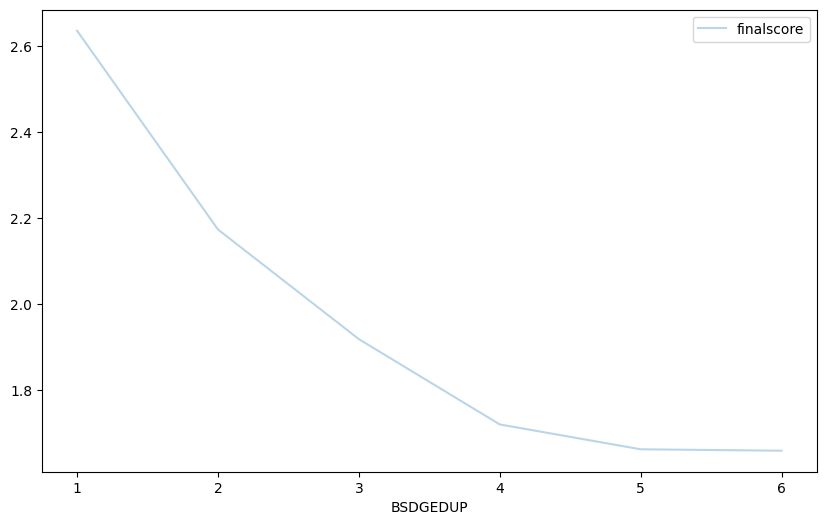


 correlation of finalscore and BSBG04 : 


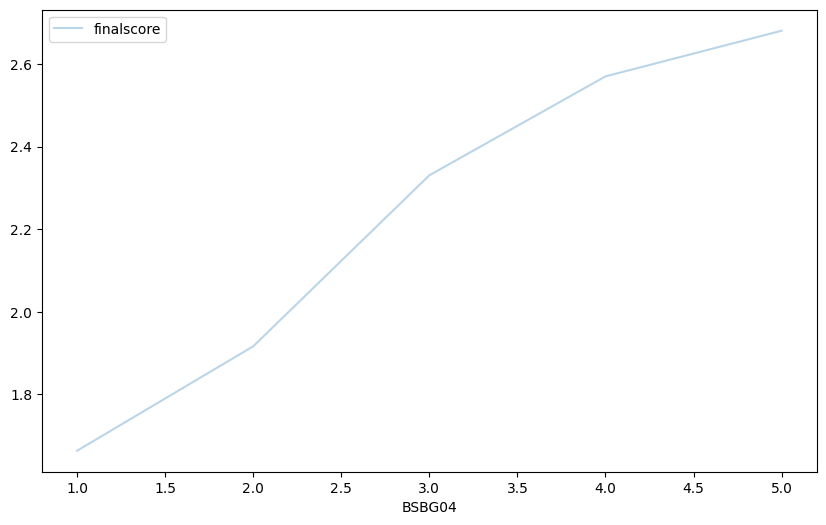


 correlation of finalscore and BSBM19H : 


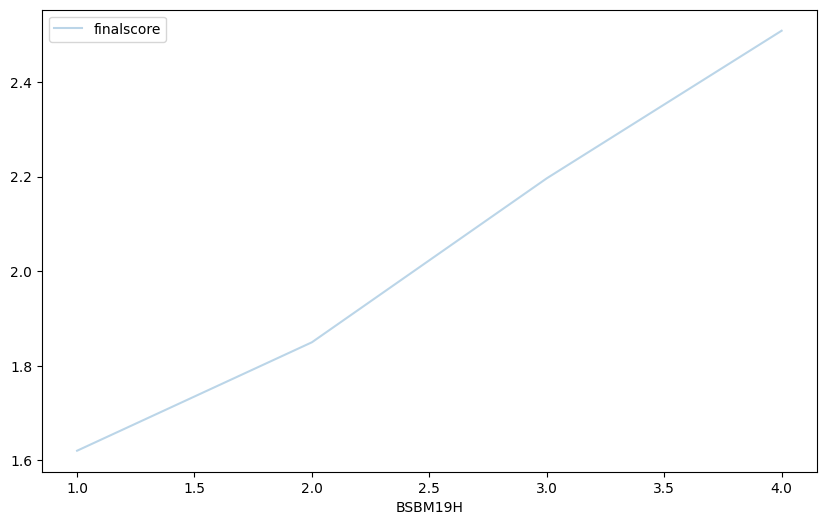

In [39]:
show_corr(timss_data, 'BSDGEDUP', 'finalscore')
show_corr(timss_data, 'BSBG04', 'finalscore')
show_corr(timss_data, 'BSBM19H', 'finalscore')

In [40]:
girl_data = timss_data[timss_data['BSBG01']==1]
girl_data

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM20E,BTBM21,BTBM22AA,BTBM22AC,BTBM22AD,BTBM22AE,BTBM22AF,BTBM22AG,BTBM23,BTDMNUM
0,2,5,2,1,1,1.0,2.0,3.0,1.0,1.0,...,3,5,1,2,2,1,1,2,5,100.0
1,2,2,2,1,2,1.0,1.0,3.0,1.0,1.0,...,3,5,1,2,2,1,1,2,5,100.0
2,4,4,2,3,4,1.0,1.0,4.0,1.0,1.0,...,3,5,1,2,2,1,1,2,5,100.0
3,1,2,1,1,1,1.0,1.0,2.0,2.0,2.0,...,3,3,2,2,2,2,2,2,4,100.0
4,2,2,3,1,2,1.0,1.0,2.0,1.0,1.0,...,3,3,2,2,2,2,2,2,4,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,1,1,1,2,1,1.0,3.0,3.0,1.0,2.0,...,3,5,1,1,1,2,1,1,3,100.0
5973,3,3,2,3,2,1.0,1.0,2.0,1.0,1.0,...,3,5,1,2,1,2,2,2,3,100.0
5974,2,3,2,3,2,1.0,1.0,1.0,1.0,2.0,...,3,5,1,2,1,2,2,2,3,100.0
5976,2,1,1,3,1,1.0,4.0,1.0,2.0,1.0,...,3,5,1,1,1,1,1,1,5,100.0


In [41]:
not_unique_attributes, best_attributes = desicion_tree(girl_data,
                                                       'finalscore',
                                                       ['finalscorealgebra', 'finalscoredat',	'finalscoregeo', 'finalscorenum']
                                                       )

girl_data = girl_data[['finalscore'] + best_attributes + not_unique_attributes]


features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BCBG06B', 'BCBG07', 'BTBM14', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BSDGEDUP    7
BSBG07      7
BTBG06E     6
BTBM19B     6
           ..
BTBG05F     2
BCBG12      2
BCBG10A     2
BCBG09      2
BSBG01      1
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBM19H     0.040164
BSDGEDUP    0.026788
BSBM19F     0.025989
BSBG04      0.025940
BSBM15      0.024436
BSBG11B     0.023301
BSBG07      0.020858
BSBM19B     0.020801
BSBM19C     0.020283
BSBG10      0.018367
BSBM17A     0.018135
BSBM20C     0.016894
BSBG13E     0.015750
BSBM18F     0.015724
BSBM16A     0.015580
BSBG13C     0.015197
BSBM18A     0.014296
BSBG11A     0.013908
BSBM16C     0.013532
BSBG13D     0.013422


In [42]:
spr_corr(girl_data, 'finalscore')

[('BSDGEDUP', -0.3271797579967266),
 ('BSBM19F', -0.2348147798817307),
 ('BSBM15', -0.2028598661533454),
 ('BSBM16A', -0.16363596082223805),
 ('BTBG11', -0.10733142631279657),
 ('BSBM17A', -0.10315589276552259),
 ('BSBM20C', -0.08953957477866356),
 ('BSBG13E', -0.0868753121886076),
 ('BSDAGE', -0.05710863337132018),
 ('BSBG11A', 0.00230544640301594),
 ('BSBG13D', 0.006190963861496448),
 ('BSBG13C', 0.027882409640206496),
 ('BSBM18A', 0.03031637573063933),
 ('BCBG06A', 0.03690960131825349),
 ('BSBG11B', 0.050755916239867145),
 ('BSBM18F', 0.07610080655885919),
 ('BTBG01', 0.10514838282474667),
 ('BSBG10', 0.12287851103538751),
 ('BTBM14', 0.12870396453412417),
 ('BCBG06B', 0.16889172611451567),
 ('BSBM16C', 0.17261611495616055),
 ('BSBG06A', 0.18529681301809625),
 ('BCBG07', 0.18729091052303412),
 ('BSBM19C', 0.24446877711309722),
 ('BSBG07', 0.2580394299050621),
 ('BSBM19B', 0.2980840754945384),
 ('BSBM19H', 0.30570281360170337),
 ('BSBG04', 0.3214996258832618)]


 correlation of finalscore and BSDGEDUP : 


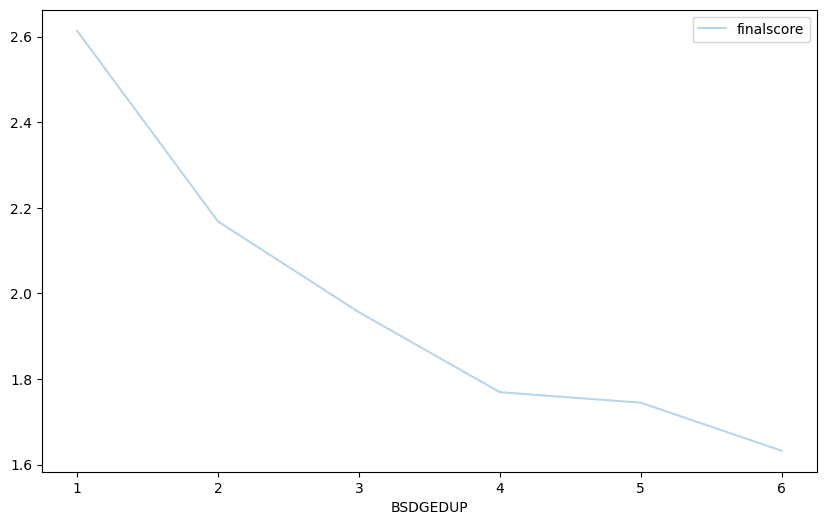


 correlation of finalscore and BSBG04 : 


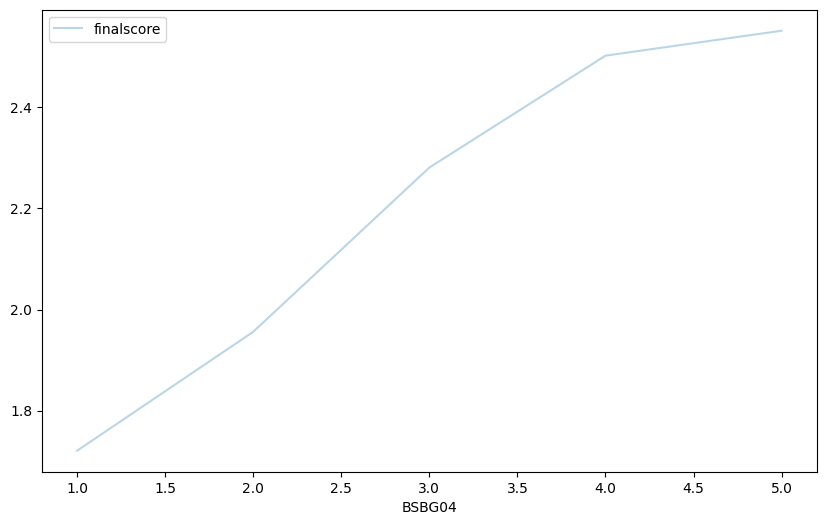


 correlation of finalscore and BSBM19H : 


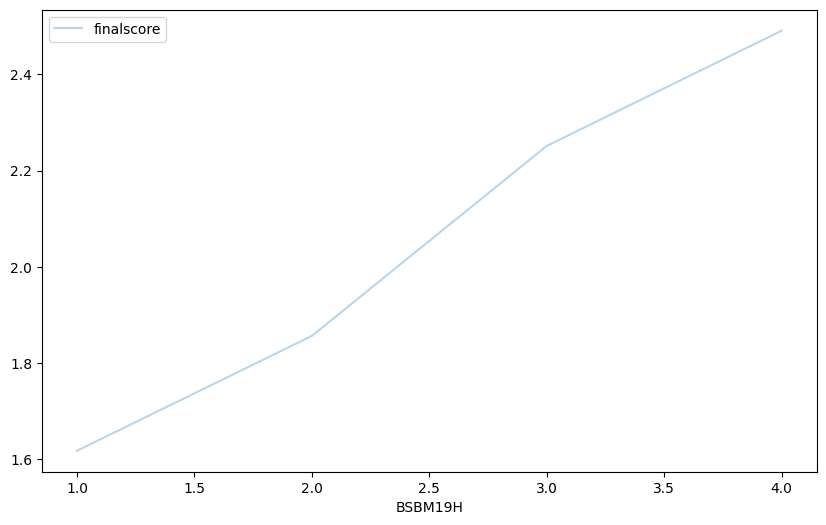

In [43]:
show_corr(girl_data, 'BSDGEDUP', 'finalscore')
show_corr(girl_data, 'BSBG04', 'finalscore')
show_corr(girl_data, 'BSBM19H', 'finalscore')

In [44]:
boy_data = timss_data[timss_data['BSBG01']==2]
boy_data

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM20E,BTBM21,BTBM22AA,BTBM22AC,BTBM22AD,BTBM22AE,BTBM22AF,BTBM22AG,BTBM23,BTDMNUM
5,1,2,2,1,1,2.0,4.0,3.0,2.0,2.0,...,3,5,2,2,2,1,2,2,2,100.0
6,1,1,2,1,1,2.0,4.0,2.0,1.0,1.0,...,3,5,2,2,2,1,1,2,3,100.0
7,2,2,1,1,2,2.0,1.0,2.0,1.0,2.0,...,3,5,2,2,2,1,1,2,3,100.0
11,1,2,2,1,1,2.0,2.0,1.0,1.0,1.0,...,1,3,2,2,1,2,2,2,4,100.0
12,2,2,1,1,2,2.0,3.0,3.0,1.0,2.0,...,1,3,2,2,1,2,2,2,4,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,4,4,3,3,2,2.0,1.0,2.0,1.0,2.0,...,1,5,1,1,2,1,2,2,2,100.0
5972,3,3,2,4,2,2.0,1.0,3.0,1.0,1.0,...,1,5,1,1,2,1,2,2,2,100.0
5975,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,...,3,5,2,2,1,2,2,2,2,100.0
5978,2,1,1,3,1,2.0,1.0,5.0,1.0,1.0,...,2,5,1,2,2,1,1,1,4,100.0


In [45]:
not_unique_attributes, best_attributes = desicion_tree(boy_data,
                                                       'finalscore',
                                                       ['finalscorealgebra', 'finalscoredat',	'finalscoregeo', 'finalscorenum']
                                                       )

boy_data = boy_data[['finalscore'] + best_attributes + not_unique_attributes]


features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BTBM14', 'BCBG06B', 'BCBG07', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BSDGEDUP    7
BSBG07      7
BSBG04      6
BCBG14E     6
           ..
BTBG05F     2
BTBG05G     2
BTBG05H     2
BTBM18BF    2
BSBG01      1
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBG07      0.044322
BSBM19B     0.028878
BSDGEDUP    0.027800
BSBM19H     0.026557
BSBG04      0.026202
BCBG05A     0.022682
BSBG14E     0.021845
BSBM15      0.021315
BSBM19F     0.020422
BSBM16C     0.017815
BSBM19C     0.015753
BSBG11A     0.015159
BSBM20C     0.014934
BSBG13C     0.014549
BSBG11B     0.014449
BSBG03      0.014211
BTBM15D     0.014122
BSBG13E     0.013727
BSBG13D     0.012841
BSBG13A     0.012789


In [46]:
spr_corr(boy_data, 'finalscore')

[('BSDGEDUP', -0.3271797579967266),
 ('BCBG05A', -0.2593946744430982),
 ('BSBM19F', -0.2348147798817307),
 ('BSBM15', -0.2028598661533454),
 ('BSBG03', -0.16232040559790045),
 ('BTBG11', -0.10733142631279657),
 ('BSBM20C', -0.08953957477866356),
 ('BSBG13E', -0.0868753121886076),
 ('BSDAGE', -0.05710863337132018),
 ('BSBG14E', -0.001201297267217125),
 ('BSBG11A', 0.00230544640301594),
 ('BSBG13D', 0.006190963861496448),
 ('BTBM15D', 0.020345309701157253),
 ('BSBG13A', 0.02468607573893295),
 ('BSBG13C', 0.027882409640206496),
 ('BCBG06A', 0.03690960131825349),
 ('BSBG11B', 0.050755916239867145),
 ('BTBG01', 0.10514838282474667),
 ('BTBM14', 0.12870396453412417),
 ('BCBG06B', 0.16889172611451567),
 ('BSBM16C', 0.17261611495616055),
 ('BSBG06A', 0.18529681301809625),
 ('BCBG07', 0.18729091052303412),
 ('BSBM19C', 0.24446877711309722),
 ('BSBG07', 0.2580394299050621),
 ('BSBM19B', 0.2980840754945384),
 ('BSBM19H', 0.30570281360170337),
 ('BSBG04', 0.3214996258832618)]


 correlation of finalscore and BSDGEDUP : 


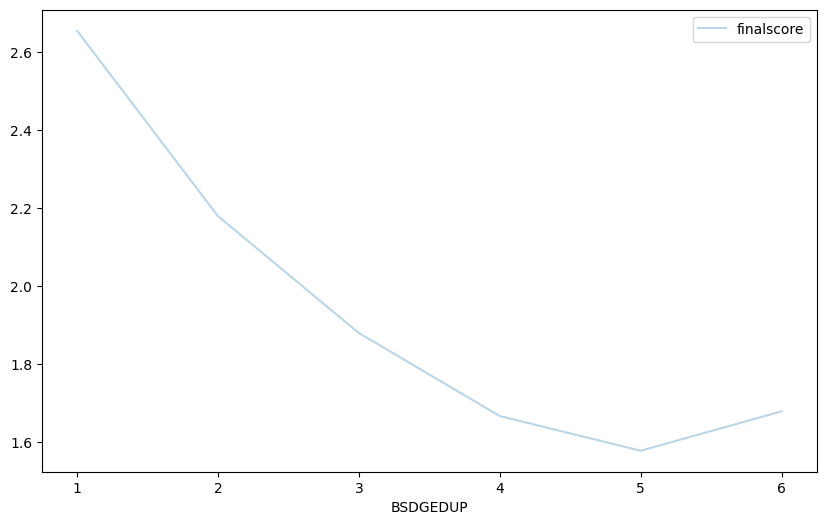


 correlation of finalscore and BSBG04 : 


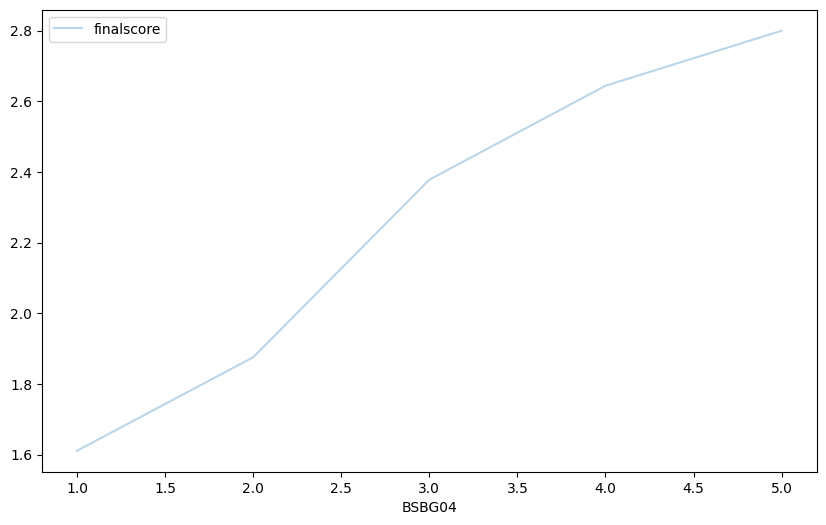


 correlation of finalscore and BSBM19H : 


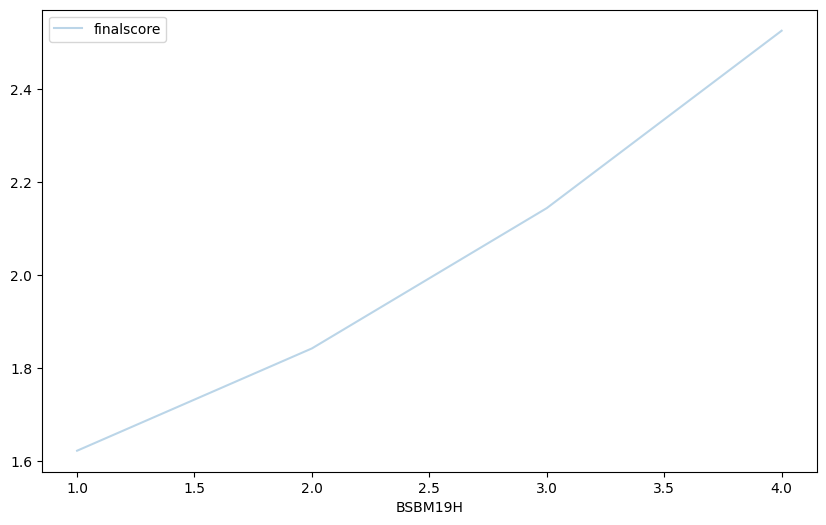

In [47]:
show_corr(boy_data, 'BSDGEDUP', 'finalscore')
show_corr(boy_data, 'BSBG04', 'finalscore')
show_corr(boy_data, 'BSBM19H', 'finalscore')

###Algebra

In [48]:

not_unique_attributes, best_attributes = desicion_tree(timss_data,'finalscorealgebra', ['finalscore', 'finalscoredat',	'finalscoregeo', 'finalscorenum'])

algebra_data = timss_data[['finalscorealgebra'] + best_attributes + not_unique_attributes]




features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BCBG06B', 'BTBM14', 'BCBG07', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BTBM19B     7
BSDGEDUP    7
BSBG07      7
BTBG06K     6
           ..
BCBG12      2
BTBG05F     2
BTBG05G     2
BTBG05H     2
BSBG01      2
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBG07      0.027070
BSBG04      0.025961
BSDGEDUP    0.025640
BSBM15      0.022813
BSBG11B     0.020735
BSBM19B     0.020075
BSBG11A     0.019622
BSBG13E     0.019430
BSBM19E     0.019078
BSBM18F     0.019075
BSBG13C     0.018972
BSBM19F     0.017604
BSBM19H     0.017313
BSBM16C     0.015928
BSBM18C     0.015139
BSBG10      0.014991
BSBG13A     0.014925
BSBG13D     0.014513
BSBM19C     0.014451
BCBG05A     0.014177


In [49]:
spr_corr(algebra_data, 'finalscorealgebra')

[('BSDGEDUP', -0.2617794169977766),
 ('BCBG05A', -0.21800738353425025),
 ('BSBM19F', -0.21073026795023092),
 ('BSBM15', -0.16555206517515184),
 ('BTBG11', -0.08799148193233831),
 ('BSBG13E', -0.08169283240199149),
 ('BSDAGE', -0.061038354127215026),
 ('BSBG13D', -0.008950876617755432),
 ('BSBG13C', -0.004999183767122322),
 ('BSBG11A', 0.009632326947426564),
 ('BSBG13A', 0.01233021186580581),
 ('BCBG06A', 0.02137624328560269),
 ('BSBG11B', 0.05634271262855658),
 ('BTBG01', 0.06728802103448417),
 ('BSBM18F', 0.07304977054338531),
 ('BSBM18C', 0.07402480134944987),
 ('BTBM14', 0.11151489649391522),
 ('BSBG10', 0.11453574710809199),
 ('BCBG06B', 0.1443273849601411),
 ('BSBM16C', 0.14511489156072077),
 ('BSBG06A', 0.15809065410982154),
 ('BSBM19E', 0.15837574959648362),
 ('BCBG07', 0.16650300546619662),
 ('BSBM19C', 0.19543232411330302),
 ('BSBG07', 0.21285622391508355),
 ('BSBM19B', 0.23686431352908932),
 ('BSBM19H', 0.2471757015681578),
 ('BSBG04', 0.2536582531725078)]


 correlation of finalscorealgebra and BSBG04 : 


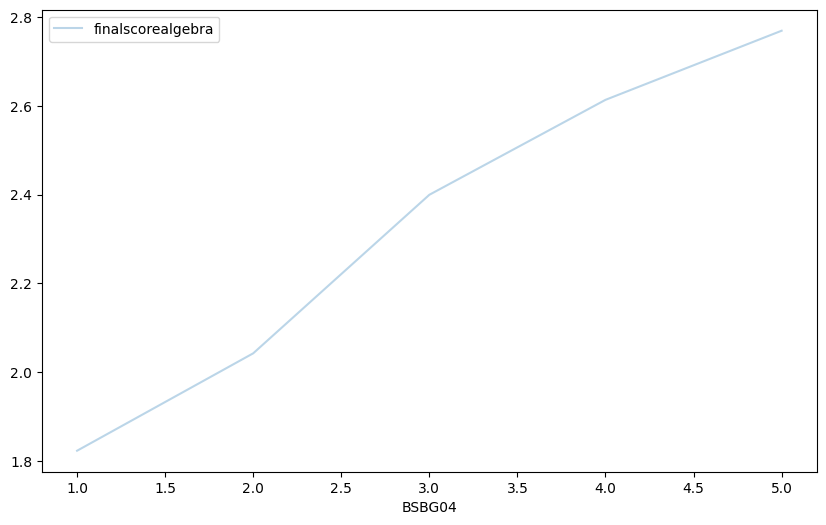


 correlation of finalscorealgebra and BSBM19H : 


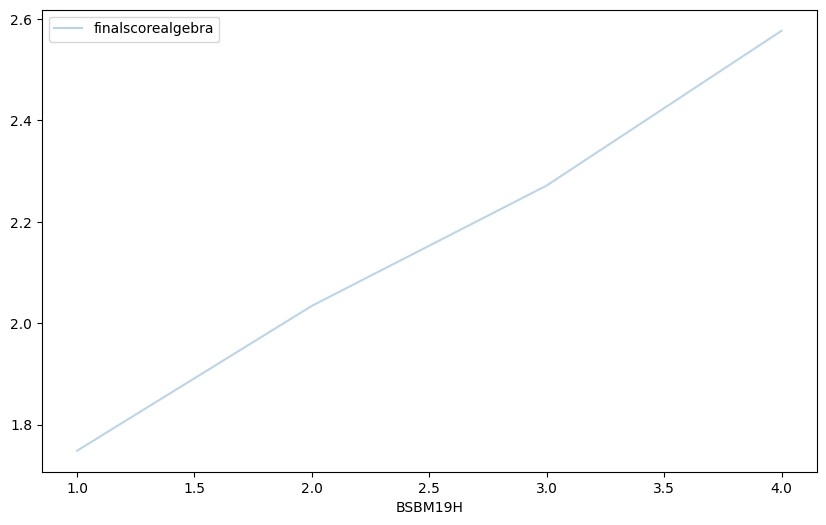


 correlation of finalscorealgebra and BSDGEDUP : 


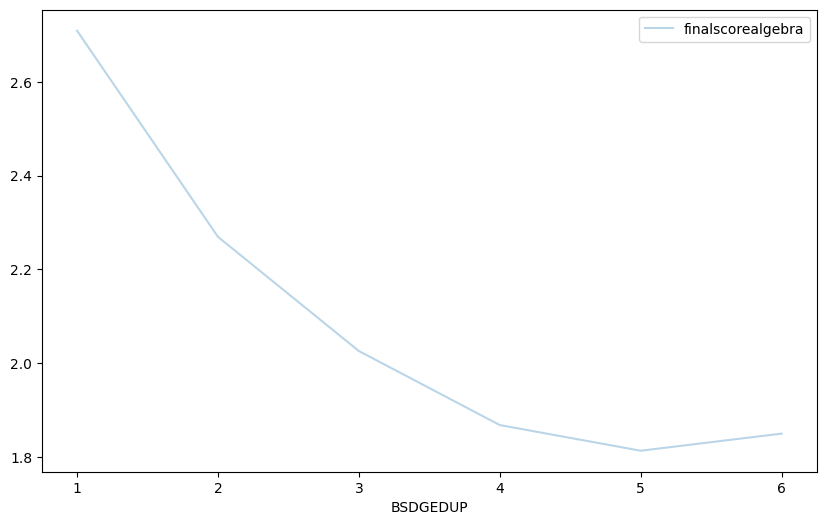

In [50]:
show_corr(algebra_data, 'BSBG04', 'finalscorealgebra')
show_corr(algebra_data, 'BSBM19H', 'finalscorealgebra')
show_corr(algebra_data, 'BSDGEDUP', 'finalscorealgebra')

###Datas

In [51]:
not_unique_attributes, best_attributes = desicion_tree(timss_data, 'finalscoredat', ['finalscore', 'finalscorealgebra',	'finalscoregeo', 'finalscorenum']  )
dat_data = timss_data[['finalscoredat'] + best_attributes + not_unique_attributes]





features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BCBG06B', 'BTBM14', 'BCBG07', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BTBM19B     7
BSDGEDUP    7
BSBG07      7
BTBG06K     6
           ..
BCBG12      2
BTBG05F     2
BTBG05G     2
BTBG05H     2
BSBG01      2
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBG07      0.026289
BSBM16C     0.018528
BSBG11B     0.018425
BSBG04      0.018324
BSDGEDUP    0.018059
BSBM18A     0.017833
BSBM15      0.017673
BSBG10      0.017230
BSBG13E     0.017070
BSBM18C     0.016753
BSBM19H     0.016142
BSBG13D     0.015924
BSBM19B     0.014750
BSBM19F     0.014241
BSBM18F     0.014214
BSBM19C     0.014045
BSBG13C     0.013774
BSBM19E     0.013572
BSBM20C     0.012783
BSBG11A     0.012260


In [52]:
spr_corr(dat_data, 'finalscoredat')

[('BSDGEDUP', -0.19426594737537659),
 ('BSBM19F', -0.12120309897938521),
 ('BSBM15', -0.11321252571654272),
 ('BTBG11', -0.07704141944338025),
 ('BSBM20C', -0.06125943242530105),
 ('BSBG13E', -0.048926000164134856),
 ('BSDAGE', -0.022918246448325123),
 ('BSBG11A', -0.020537678933734874),
 ('BSBM18A', 0.004512741579245762),
 ('BSBG11B', 0.01083504421839622),
 ('BSBG13C', 0.015686810053679254),
 ('BSBG13D', 0.01632323075035961),
 ('BCBG06A', 0.019985003182904824),
 ('BSBM18F', 0.04514063560201798),
 ('BSBM18C', 0.04620134001474864),
 ('BTBG01', 0.06470653732598489),
 ('BSBG10', 0.0696074660133619),
 ('BTBM14', 0.07690925447358724),
 ('BSBM16C', 0.08315264050668103),
 ('BCBG06B', 0.10548344979271573),
 ('BSBM19E', 0.11049476412511983),
 ('BCBG07', 0.11062571721822156),
 ('BSBG06A', 0.11099960655234248),
 ('BSBM19C', 0.15287655943687287),
 ('BSBG07', 0.16727742815721727),
 ('BSBM19B', 0.17946686052527386),
 ('BSBM19H', 0.18513380707257465),
 ('BSBG04', 0.2008768373735551)]


 correlation of finalscoredat and BSBM19B : 


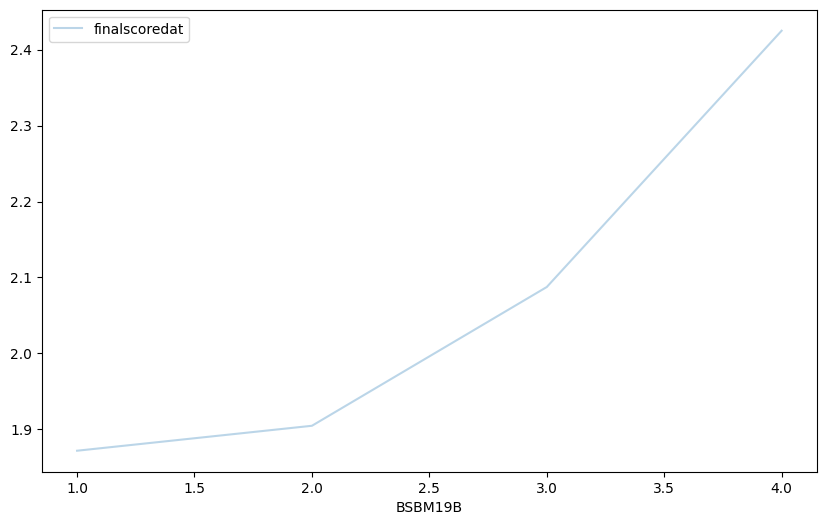


 correlation of finalscoredat and BSBG04 : 


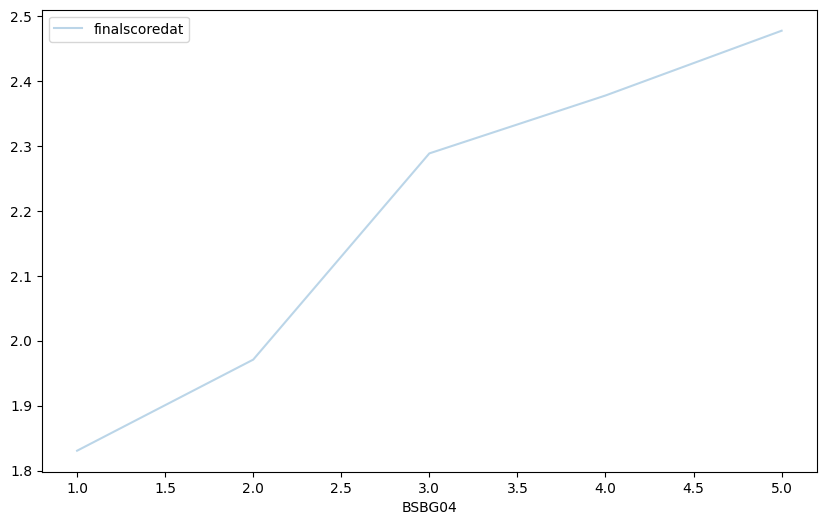


 correlation of finalscoredat and BSBM19H : 


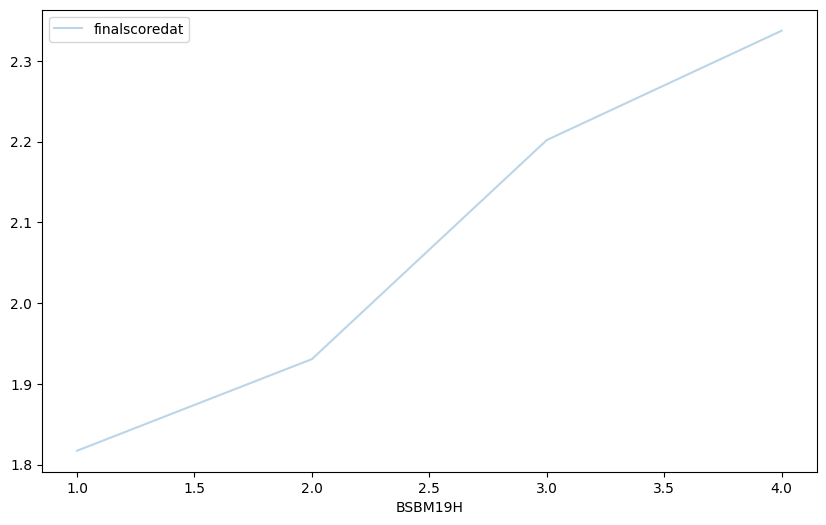

In [53]:
show_corr(dat_data, 'BSBM19B', 'finalscoredat')
show_corr(dat_data, 'BSBG04', 'finalscoredat')
show_corr(dat_data, 'BSBM19H', 'finalscoredat')

###Geometry

In [54]:
not_unique_attributes, best_attributes = desicion_tree(timss_data, 'finalscoregeo', ['finalscore', 'finalscoredat',	'finalscorealgebra', 'finalscorenum'])
geo_data = timss_data[['finalscoregeo'] + best_attributes + not_unique_attributes]



features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BCBG06B', 'BTBM14', 'BCBG07', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BTBM19B     7
BSDGEDUP    7
BSBG07      7
BTBG06K     6
           ..
BCBG12      2
BTBG05F     2
BTBG05G     2
BTBG05H     2
BSBG01      2
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBM19H     0.035447
BSDGEDUP    0.027585
BSBM19C     0.021262
BSBM19B     0.019363
BSBG14B     0.019355
BSBM15      0.019004
BSBG11B     0.018469
BSBG04      0.018104
BSBM19E     0.017999
BSBG13C     0.016769
BSBM19F     0.016057
BSBM20A     0.015785
BSBM18F     0.015645
BSBM16A     0.015352
BSBM20H     0.015271
BSBM17E     0.015142
BSBG10      0.014863
BSBG11A     0.014710
BSBG13E     0.014380
BSBG07      0.014240


In [55]:
spr_corr(geo_data, 'finalscoregeo')

[('BSDGEDUP', -0.2178765220687409),
 ('BSBM19F', -0.16027790240191878),
 ('BSBM15', -0.14874686844632656),
 ('BSBM16A', -0.10881374037694075),
 ('BTBG11', -0.07017021695512518),
 ('BSBG13E', -0.0664364153963977),
 ('BSBM20A', -0.05144185177137493),
 ('BSBM20H', -0.04848550228544525),
 ('BSDAGE', -0.035832570807212305),
 ('BSBM17E', 0.00927186972192079),
 ('BSBG14B', 0.011627328988245507),
 ('BSBG11A', 0.015650882753107682),
 ('BCBG06A', 0.01631368745181666),
 ('BSBG13C', 0.018929849571397397),
 ('BSBG11B', 0.021467215853973456),
 ('BSBM18F', 0.05648523712204899),
 ('BTBG01', 0.06773127215979904),
 ('BTBM14', 0.07814403053656696),
 ('BSBG10', 0.08538078889839934),
 ('BCBG07', 0.1113836483029293),
 ('BCBG06B', 0.11687874519648038),
 ('BSBG06A', 0.13288986031061495),
 ('BSBM19E', 0.13665553616020765),
 ('BSBG07', 0.14857146047898445),
 ('BSBM19C', 0.17581476338469249),
 ('BSBG04', 0.20121488659489792),
 ('BSBM19B', 0.2020948777817498),
 ('BSBM19H', 0.2122904932245139)]


 correlation of finalscoregeo and BSDGEDUP : 


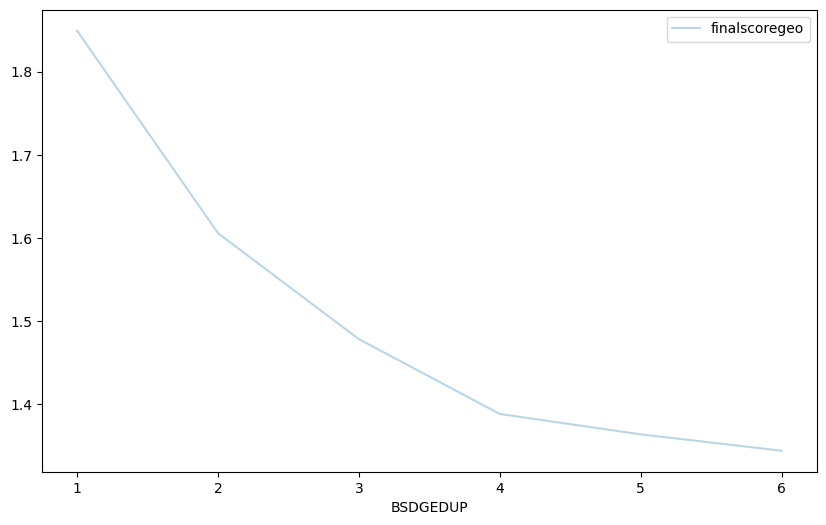


 correlation of finalscoregeo and BSBM19B : 


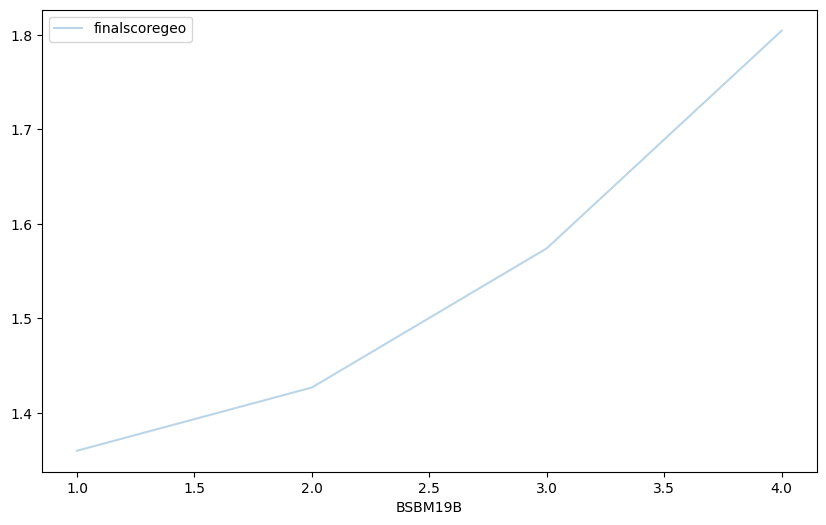


 correlation of finalscoregeo and BSBM19H : 


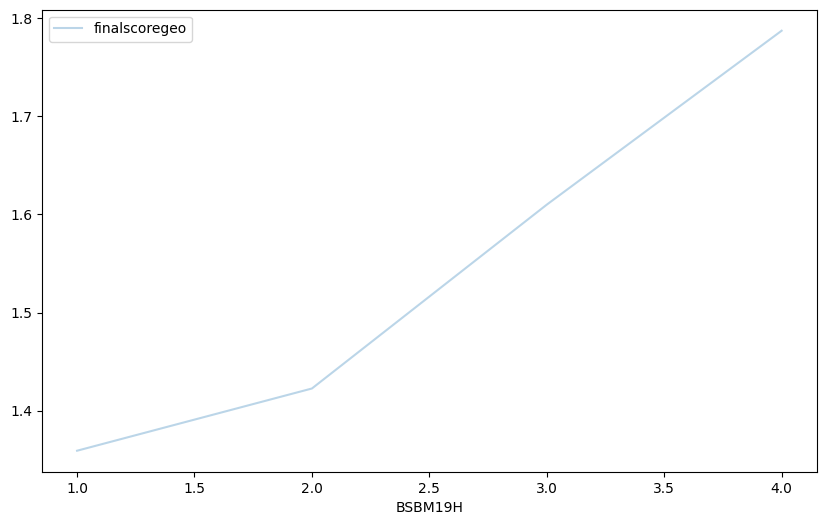

In [56]:
show_corr(geo_data, 'BSDGEDUP', 'finalscoregeo')
show_corr(geo_data, 'BSBM19B', 'finalscoregeo')
show_corr(geo_data, 'BSBM19H', 'finalscoregeo')

###Numbers

In [57]:
not_unique_attributes, best_attributes = desicion_tree(timss_data,  'finalscorenum', ['finalscore', 'finalscoredat',	'finalscoregeo', 'finalscorealgebra'])
num_data = timss_data[['finalscorenum'] + best_attributes + not_unique_attributes]



features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BCBG06B', 'BTBM14', 'BCBG07', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BTBM19B     7
BSDGEDUP    7
BSBG07      7
BTBG06K     6
           ..
BCBG12      2
BTBG05F     2
BTBG05G     2
BTBG05H     2
BSBG01      2
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBG04      0.036009
BSBM19H     0.027421
BSDGEDUP    0.026679
BSBM19B     0.023133
BSBM15      0.021684
BSBM19F     0.018746
BSBM19C     0.015836
BSBG13D     0.015298
BSBG11B     0.014796
BSBG13E     0.014314
BSBG11A     0.014311
BSBM16C     0.013992
BTBG06E     0.013557
BSBM18A     0.013541
BSBM17E     0.013345
BSBG07      0.013214
BSBM16A     0.013043
BSBG10      0.013016
BSBM18C     0.012763
BSBG13B     0.012187


In [58]:
spr_corr(num_data, 'finalscorenum')

[('BSDGEDUP', -0.2596644129373602),
 ('BSBM19F', -0.2089591690346812),
 ('BTBG06E', -0.17782490550278388),
 ('BSBM15', -0.1539053453112864),
 ('BSBM16A', -0.13626586097122234),
 ('BTBG11', -0.09034270278414841),
 ('BSBG13E', -0.08655822232509061),
 ('BSDAGE', -0.04702863495644544),
 ('BSBG11A', 0.000916667133850464),
 ('BSBG13D', 0.007391043327351181),
 ('BSBG13B', 0.008263236480619779),
 ('BSBM17E', 0.01502688738007383),
 ('BSBM18A', 0.02339672411841136),
 ('BCBG06A', 0.03193249704994679),
 ('BSBG11B', 0.04127463626933451),
 ('BSBM18C', 0.07586819296292231),
 ('BTBG01', 0.0816105431816399),
 ('BTBM14', 0.08588351920175301),
 ('BSBG10', 0.09347147125398432),
 ('BCBG06B', 0.14371193607405944),
 ('BCBG07', 0.14951619148832593),
 ('BSBG06A', 0.15433758987370694),
 ('BSBM16C', 0.1613035220860538),
 ('BSBG07', 0.18446653101844132),
 ('BSBM19C', 0.1987528954122389),
 ('BSBM19B', 0.24301383814194552),
 ('BSBM19H', 0.2672986059157613),
 ('BSBG04', 0.27123239737054256)]


 correlation of finalscorenum and BSBG04 : 


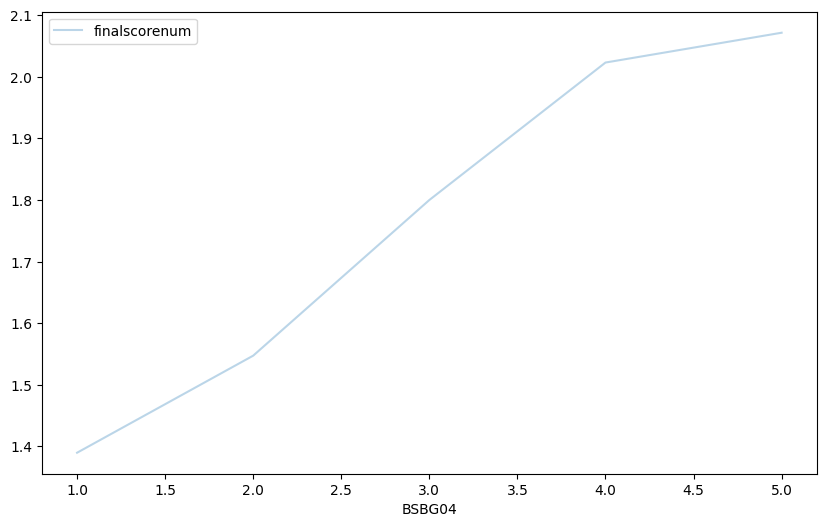


 correlation of finalscorenum and BSDGEDUP : 


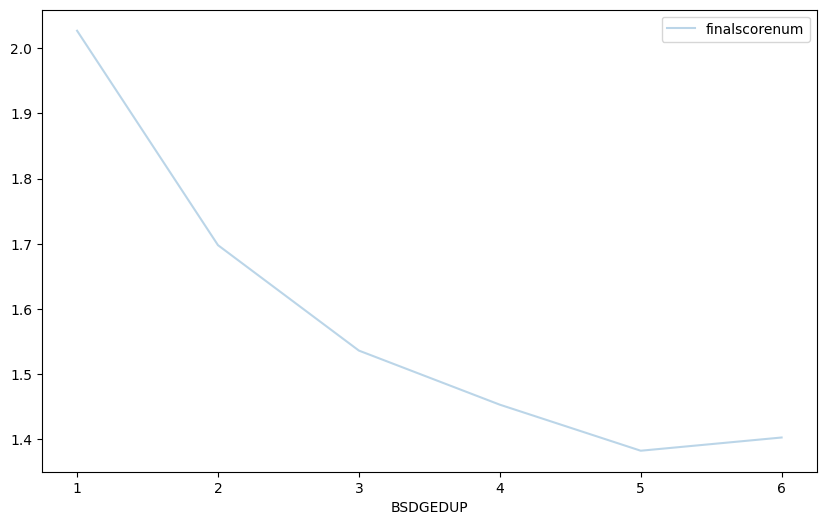


 correlation of finalscorenum and BSBM19H : 


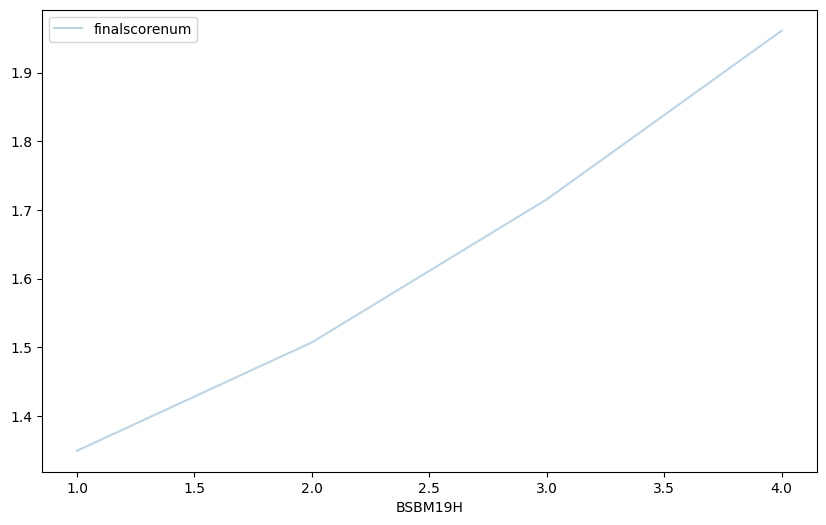

In [59]:
show_corr(num_data, 'BSBG04', 'finalscorenum')
show_corr(num_data, 'BSDGEDUP', 'finalscorenum')
show_corr(num_data, 'BSBM19H', 'finalscorenum')

For each of the columns, the three variables that have been highly dependent are as follows:

 algebra: BSBM19H : direct , BSDGEDUP : inverse , BSBG04 : direct

 datas: BSBM19B : direct , BSBG04 : direct , BSBM19H : direct

 geometry: BSDGEDUP : direct , BSBM19B : inverse , BSBM19H : direct

 numbers: BSBG04 : direct , BSDGEDUP: inverse , BSBM19H : direct

We see that the criteria are slightly different. And the correlation coefficients sometimes have significant differences between different content areas.